In [27]:
import os
os.chdir('/Volumes/FAIR/Skull_stripping-master_latest')

%matplotlib inline
import sys
sys.path.append("/Volumes/FAIR/Skull_stripping-master_latest/blast-master/blast/aux1")
sys.path.append("/Volumes/FAIR/Registered_MPS3")
import SimpleITK as sitk
import os
import numpy as np
import matplotlib.pyplot as plt
import NyulNormalizer as nyul
from Common import ensureDir, getMedicalImageBasename

from NyulNormalizer import NyulNormalizer
import math
import Dropreg
import scipy.ndimage.filters as filters
import Image_viewer as Iv
import PreProcessor_Py3


Reading directory: /Volumes/FAIR/Registered_MPS3/tutorial3
Normalizing...
Done
Skull Stripping CT...
Creating binary initalization...
Refining binary initialization...
Detecting the skull...
Constructing feature maps for the level sets...
Segmenting through level sets...
Thresholingd the level set...
Filling final holes...
Keeping only the largest connected component...
Writing to: /Volumes/FAIR/Registered_MPS3/tutorial3/CT_thinThinBrain.nii.gz ...
Done


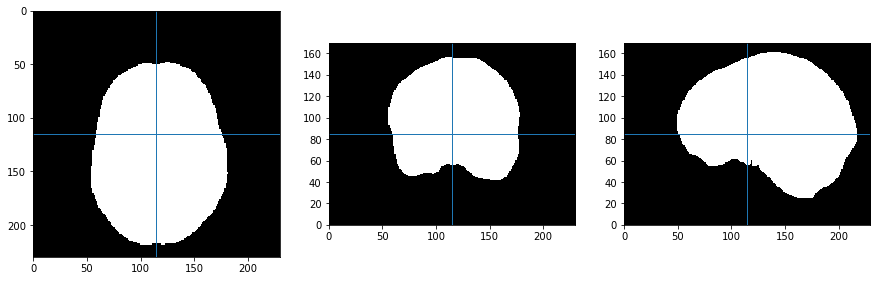

In [54]:

# paths = ['/Volumes/FAIR/Registered_MPS3/MPS1',
#          '/Volumes/FAIR/Registered_MPS3/MPS2',
#          '/Volumes/FAIR/Registered_MPS3/MPS3',
#          '/Volumes/FAIR/Registered_MPS3/MPS4',
#          '/Volumes/FAIR/Registered_MPS3/MPS5',
#          '/Volumes/FAIR/Registered_MPS3/MPS6',
#          '/Volumes/FAIR/Registered_MPS3/MPS7',
#          '/Volumes/FAIR/Registered_MPS3/MPS8',
#          '/Volumes/FAIR/Registered_MPS3/MPS9',
#          '/Volumes/FAIR/Registered_MPS3/MPS10',
#          '/Volumes/FAIR/Registered_MPS3/MPS11',
#          '/Volumes/FAIR/Registered_MPS3/MPS12',
#          '/Volumes/FAIR/Registered_MPS3/MPS13',
#          '/Volumes/FAIR/Registered_MPS3/MPS14',
#          ]

paths = ['/Volumes/FAIR/Registered_MPS3/SDH4',
         '/Volumes/FAIR/Registered_MPS3/SDH7',
         '/Volumes/FAIR/Registered_MPS3/SDH8',
         '/Volumes/FAIR/Registered_MPS3/SDH11',
         '/Volumes/FAIR/Registered_MPS3/SDH12',
         '/Volumes/FAIR/Registered_MPS3/SDH16-2',
         '/Volumes/FAIR/Registered_MPS3/SDH14',
         '/Volumes/FAIR/Registered_MPS3/SDH24',
         '/Volumes/FAIR/Registered_MPS3/CONT5',
         '/Volumes/FAIR/Registered_MPS3/CONT7',
         '/Volumes/FAIR/Registered_MPS3/EDH7',
         '/Volumes/FAIR/Registered_MPS3/Sample3_Pre',
         '/Volumes/FAIR/Registered_MPS3/Sample3_Post',
         '/Volumes/FAIR/Registered_MPS3/Sample4_Pre',
         '/Volumes/FAIR/Registered_MPS3/tutorial3']

# paths = ['/Volumes/FAIR/Registered_MPS3/ScanD',
#          '/Volumes/FAIR/Registered_MPS3/ScanE',
#          '/Volumes/FAIR/Registered_MPS3/ScanF',
#          '/Volumes/FAIR/Registered_MPS3/ScanH',
#          ]

# for i in range(len(paths)):
for i in range(14,15):
    path = paths[i]
    print( "Reading directory:", path)
    file = os.path.split(os.path.split(path)[0])[1]
    img = sitk.Cast(sitk.ReadImage(path+'/CT.nii.gz'), sitk.sitkFloat32)
    size = img.GetSize()
    spacing = img.GetSpacing()
    dir_name = os.path.split(path)[0]

    img_resampled = Iv.resample(img, new_size=[200, 200, 200])
    array = sitk.GetArrayFromImage(img_resampled)
    array[array<-100] = -1000
    array[array==0] = -1000
    img_resampled1 = sitk.GetImageFromArray(array)
    img_resampled1.CopyInformation(img_resampled)
    sitk.WriteImage(img_resampled1,path + '/' + 'CT_thin.nii.gz')
    
    #     Start skull stripping algorithm
    pp = PreProcessor_Py3.PreProcessor()
    img_orig_name =  path + '/CT_thin.nii.gz'
    pp.open(img_orig_name)
    pp.normalize()
    pp.image = pp.skullStrippingCTBrain(useAtlas=False)
    # pp.image = pp.skullStrippingCTHead()
    mask_name = pp.writeExtendingFilename(extendingName="ThinBrain", subDir="")
    
    mask=sitk.ReadImage(mask_name)
    mask_thick = Iv.resample_mask(mask,new_size=[400, 400, 60])
    sitk.WriteImage(mask_thick,path+'/Brain.nii.gz')
    Iv.display_image(pp.image)

In [53]:
# for i in range(len(paths)):
for i in range(14,15):
    path = paths[i]
    print( "Reading directory:", path)
    file = os.path.split(os.path.split(path)[0])[1]
    img = sitk.Cast(sitk.ReadImage(path+'/CT.nii.gz'), sitk.sitkFloat32)
    size = img.GetSize()
    spacing = img.GetSpacing()
    dir_name = os.path.split(path)[0]

    array = sitk.GetArrayFromImage(img)
    array[array<-100] = -1000
    array[array==0] = -1000
    img_resampled1 = sitk.GetImageFromArray(array)
    img_resampled1.CopyInformation(img)
    sitk.WriteImage(img_resampled1,path + '/' + 'CT.nii.gz')


Reading directory: /Volumes/FAIR/Registered_MPS3/tutorial3


In [38]:
array[array==0]

array([], dtype=float32)